Anomaly detection is a technique for finding an unusual point or pattern in a given set. 

The term anomaly is also referred to as outlier. Earlier, the data mining researchers were focused on other techniques like classification and clustering. Outlier are found as a part of data cleansing process. 

However, view underwent a change in 2000 when researchers found detection of abnormal things can help solving the real world problems seen in damage detection, fraud detection, detection of abnormal health condition and intrusion detection.

In this notebook we'll be using multiple machine learning algorithms to detect and classify suspicious credit card transactions. 

In [ ]:
! pip install easypreprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from datetime import datetime
import math
import pickle
from easypreprocessing import EasyPreProcessing

# Preprocessing

In [ ]:
prep = EasyPreProcessing(path='/content/drive/MyDrive/Kaggle/creditcard.csv')


**Initialization Parameters**

1.  output            - Set output variable/dependent variable
2.  dates.features    - Set datetime field names (optional)

For example:
1.  output = 'column_name'
2.  dates.features = ['date_field_1','date_field_2']
        

In [ ]:
prep.df.shape

(284807, 31)

In [ ]:
prep.dataset = prep.df.sample(frac=0.5)
prep.df.reset_index(drop=True, inplace=True)
prep.df.shape

(142404, 31)

In [ ]:
prep.df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,48375.0,-0.545806,0.686342,2.105970,0.786598,0.491212,0.053878,0.715685,-0.029059,-0.493559,-0.068437,-0.773930,-0.202810,-0.409850,-0.441746,-0.927480,0.105581,-0.195732,-1.248851,-1.177228,-0.093130,-0.232318,-0.471675,0.009608,0.090078,-0.574693,0.555533,-0.110886,-0.095404,6.85,0
1,88127.0,-0.877134,0.027889,3.375979,0.308167,-0.694697,1.766167,-0.496208,0.005334,0.979663,1.376646,-1.825032,-0.093953,0.553921,-2.349453,-1.178747,-2.520772,0.265309,1.628035,0.140431,0.257614,-0.511557,0.296210,-0.478690,0.606034,0.535658,-0.250454,0.184735,-0.358906,10.00,0
2,39628.0,-1.419886,1.808589,0.457963,2.471223,0.183311,1.305300,-0.093348,0.953873,-2.068809,0.616840,0.241472,0.640245,1.302956,0.766692,0.772103,0.330049,-0.109217,0.567807,1.096370,-0.127565,0.280318,0.568673,-0.271461,-1.097679,0.534855,0.487792,-0.576308,-0.183791,43.98,0
3,143862.0,-0.743125,-0.220901,2.791287,1.238249,-1.126461,1.354924,0.960993,-0.496079,1.447692,0.119308,-1.257321,-0.229258,-0.095926,-1.612579,-0.061555,-0.504539,-0.331660,0.502392,0.558061,0.066023,0.061474,1.171406,-0.298816,0.025744,-0.269089,-0.432373,-0.401485,-0.449943,240.00,0
4,31234.0,1.275253,0.259351,0.045132,1.006089,-0.112986,-0.686172,0.134409,-0.135510,0.190297,0.047550,-1.066306,-0.590116,-1.038839,0.582767,1.083320,0.258870,-0.556476,0.162716,-0.161735,-0.192642,-0.018915,-0.066454,-0.154533,-0.171304,0.719870,-0.291646,0.005051,0.013036,7.50,0


In [ ]:
prep.output = 'Class'

In [ ]:
prep.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142404 entries, 0 to 142403
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    142404 non-null  float64
 1   V1      142404 non-null  float64
 2   V2      142404 non-null  float64
 3   V3      142404 non-null  float64
 4   V4      142404 non-null  float64
 5   V5      142404 non-null  float64
 6   V6      142404 non-null  float64
 7   V7      142404 non-null  float64
 8   V8      142404 non-null  float64
 9   V9      142404 non-null  float64
 10  V10     142404 non-null  float64
 11  V11     142404 non-null  float64
 12  V12     142404 non-null  float64
 13  V13     142404 non-null  float64
 14  V14     142404 non-null  float64
 15  V15     142404 non-null  float64
 16  V16     142404 non-null  float64
 17  V17     142404 non-null  float64
 18  V18     142404 non-null  float64
 19  V19     142404 non-null  float64
 20  V20     142404 non-null  float64
 21  V21     14

In [ ]:
prep.df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,142404.000000,142404.000000,142404.000000,142404.000000,142404.000000,142404.000000,142404.000000,142404.000000,142404.000000,142404.000000,142404.000000,142404.000000,142404.000000,142404.000000,142404.000000,142404.000000,142404.000000,142404.000000,142404.000000,142404.000000,142404.000000,142404.000000,142404.000000,142404.000000,142404.000000,142404.000000,142404.000000,142404.000000,142404.000000,142404.000000,142404.000000
mean,94748.344738,0.004861,0.002436,-0.001504,-0.001944,-0.003365,0.003142,-0.001807,0.000387,0.000844,0.001409,-0.000187,-0.001207,-0.001137,-0.001776,-0.002246,-0.002386,-0.001254,-0.000582,-0.000653,-0.000729,0.000487,0.001575,0.000106,-0.000595,0.001892,0.001197,0.000336,-0.000176,87.968858,0.001727
std,47440.845650,1.952985,1.634110,1.518476,1.419814,1.390637,1.338505,1.262539,1.214198,1.100781,1.096592,1.018894,1.005003,0.995309,0.963970,0.916214,0.885053,0.868980,0.841881,0.813263,0.781240,0.743756,0.725779,0.604892,0.607742,0.519373,0.482586,0.409155,0.321405,253.027649,0.041527
min,0.000000,-46.855047,-60.464618,-48.325589,-5.683171,-113.743307,-20.869626,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-18.493773,-4.196620,-14.129855,-25.162799,-9.498746,-6.938297,-54.497720,-34.830382,-9.499423,-32.828995,-2.822684,-8.696627,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54208.750000,-0.919111,-0.603672,-0.891280,-0.854852,-0.691718,-0.767584,-0.557147,-0.207537,-0.643794,-0.534671,-0.759808,-0.407458,-0.650226,-0.424772,-0.584001,-0.474342,-0.483767,-0.498531,-0.456340,-0.212081,-0.227815,-0.540687,-0.162442,-0.356473,-0.316133,-0.326416,-0.070496,-0.052508,5.550000,0.000000
50%,84628.000000,0.024471,0.065125,0.177940,-0.022277,-0.057575,-0.274496,0.038275,0.023600,-0.050691,-0.091304,-0.031833,0.139755,-0.014152,0.049435,0.046421,0.068230,-0.066777,-0.004495,0.003901,-0.062859,-0.028672,0.007737,-0.010934,0.040738,0.019238,-0.051250,0.001575,0.011327,22.000000,0.000000
75%,139168.250000,1.317101,0.802560,1.023506,0.740716,0.609820,0.402877,0.569897,0.328516,0.599994,0.460374,0.736719,0.617101,0.661300,0.493423,0.645380,0.524759,0.399531,0.500482,0.458339,0.132833,0.186480,0.530577,0.146357,0.441242,0.351599,0.242269,0.091305,0.078219,77.750000,0.000000
max,172788.000000,2.454930,22.057729,9.382558,16.875344,28.762671,73.301626,120.589494,18.748872,15.594995,23.745136,11.669205,7.848392,7.126883,10.526766,8.877742,17.315112,8.538195,4.712398,5.591971,38.117209,27.202839,10.503090,19.228169,4.584549,5.541598,3.517346,31.612198,15.942151,25691.160000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


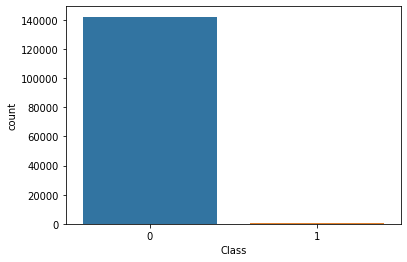

In [ ]:
sns.countplot(prep.df.Class)

The dataset is imbalance, so we cannot go with Accuracy as a metrics for measuring the performance of the model.

Instead we should go for Precision and Recall.

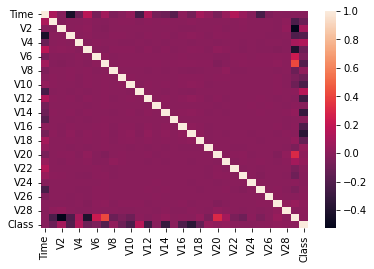

In [ ]:
prep.correlation()

In [ ]:
df = prep.df

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,48375.0,-0.545806,0.686342,2.105970,0.786598,0.491212,0.053878,0.715685,-0.029059,-0.493559,-0.068437,-0.773930,-0.202810,-0.409850,-0.441746,-0.927480,0.105581,-0.195732,-1.248851,-1.177228,-0.093130,-0.232318,-0.471675,0.009608,0.090078,-0.574693,0.555533,-0.110886,-0.095404,6.85,0
1,88127.0,-0.877134,0.027889,3.375979,0.308167,-0.694697,1.766167,-0.496208,0.005334,0.979663,1.376646,-1.825032,-0.093953,0.553921,-2.349453,-1.178747,-2.520772,0.265309,1.628035,0.140431,0.257614,-0.511557,0.296210,-0.478690,0.606034,0.535658,-0.250454,0.184735,-0.358906,10.00,0
2,39628.0,-1.419886,1.808589,0.457963,2.471223,0.183311,1.305300,-0.093348,0.953873,-2.068809,0.616840,0.241472,0.640245,1.302956,0.766692,0.772103,0.330049,-0.109217,0.567807,1.096370,-0.127565,0.280318,0.568673,-0.271461,-1.097679,0.534855,0.487792,-0.576308,-0.183791,43.98,0
3,143862.0,-0.743125,-0.220901,2.791287,1.238249,-1.126461,1.354924,0.960993,-0.496079,1.447692,0.119308,-1.257321,-0.229258,-0.095926,-1.612579,-0.061555,-0.504539,-0.331660,0.502392,0.558061,0.066023,0.061474,1.171406,-0.298816,0.025744,-0.269089,-0.432373,-0.401485,-0.449943,240.00,0
4,31234.0,1.275253,0.259351,0.045132,1.006089,-0.112986,-0.686172,0.134409,-0.135510,0.190297,0.047550,-1.066306,-0.590116,-1.038839,0.582767,1.083320,0.258870,-0.556476,0.162716,-0.161735,-0.192642,-0.018915,-0.066454,-0.154533,-0.171304,0.719870,-0.291646,0.005051,0.013036,7.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142399,160704.0,-0.583999,0.295227,1.724789,0.266173,0.632000,0.190373,0.453274,0.017499,0.362556,-0.477101,-1.364863,-0.557216,-0.719562,-0.318606,0.055258,0.088107,-0.701908,0.467785,-0.696452,0.026435,0.277543,0.937050,-0.246442,0.655821,0.080537,-0.539315,-0.006045,-0.060256,31.96,0
142400,139465.0,-0.194012,0.498759,0.285100,-0.491911,0.633276,-1.306997,0.843772,-0.179072,-0.006593,-0.392539,-0.943685,0.092626,-0.106808,0.153270,-0.377465,-0.094053,-0.393511,-0.720855,-0.087555,0.065346,-0.227558,-0.599664,0.166150,0.032938,-0.475269,0.137790,0.230186,0.104443,17.99,0
142401,149561.0,-0.392943,1.041583,-0.921787,-1.255986,1.441866,-1.000017,1.519867,-0.314177,-0.528629,-0.096328,0.858091,0.538646,-0.379666,0.844813,-0.765095,-0.529372,-0.623183,0.042892,0.099434,-0.085909,0.328661,1.015925,-0.098750,0.752180,-0.336325,0.015338,0.107951,0.289929,0.77,0
142402,136972.0,1.658927,0.689136,-1.163555,4.300544,0.381701,-0.353974,-0.009362,0.037410,-0.592964,0.064074,-0.442679,-0.946437,-0.390876,-3.124024,-0.049462,2.359507,1.444852,1.043897,-1.990056,0.003651,-0.367837,-1.285141,0.303342,-0.482252,-0.606030,-0.423235,0.020650,0.059174,109.51,0


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ct = ColumnTransformer([('std_feat', StandardScaler(), ['Time', 'Amount'])], remainder='passthrough')
df[['Time', 'Amount']] = ct.fit_transform(df[['Time', 'Amount']])

Scaling down Time and Amount features

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.977502,-0.545806,0.686342,2.105970,0.786598,0.491212,0.053878,0.715685,-0.029059,-0.493559,-0.068437,-0.773930,-0.202810,-0.409850,-0.441746,-0.927480,0.105581,-0.195732,-1.248851,-1.177228,-0.093130,-0.232318,-0.471675,0.009608,0.090078,-0.574693,0.555533,-0.110886,-0.095404,-0.320594,0
1,-0.139571,-0.877134,0.027889,3.375979,0.308167,-0.694697,1.766167,-0.496208,0.005334,0.979663,1.376646,-1.825032,-0.093953,0.553921,-2.349453,-1.178747,-2.520772,0.265309,1.628035,0.140431,0.257614,-0.511557,0.296210,-0.478690,0.606034,0.535658,-0.250454,0.184735,-0.358906,-0.308145,0
2,-1.161879,-1.419886,1.808589,0.457963,2.471223,0.183311,1.305300,-0.093348,0.953873,-2.068809,0.616840,0.241472,0.640245,1.302956,0.766692,0.772103,0.330049,-0.109217,0.567807,1.096370,-0.127565,0.280318,0.568673,-0.271461,-1.097679,0.534855,0.487792,-0.576308,-0.183791,-0.173851,0
3,1.035265,-0.743125,-0.220901,2.791287,1.238249,-1.126461,1.354924,0.960993,-0.496079,1.447692,0.119308,-1.257321,-0.229258,-0.095926,-1.612579,-0.061555,-0.504539,-0.331660,0.502392,0.558061,0.066023,0.061474,1.171406,-0.298816,0.025744,-0.269089,-0.432373,-0.401485,-0.449943,0.600850,0
4,-1.338816,1.275253,0.259351,0.045132,1.006089,-0.112986,-0.686172,0.134409,-0.135510,0.190297,0.047550,-1.066306,-0.590116,-1.038839,0.582767,1.083320,0.258870,-0.556476,0.162716,-0.161735,-0.192642,-0.018915,-0.066454,-0.154533,-0.171304,0.719870,-0.291646,0.005051,0.013036,-0.318025,0


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state=20)

# Modeling (Imbalanced Dataset)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

## SVC

In [ ]:
svc = SVC(random_state=20)
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=20, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28426
           1       0.97      0.65      0.78        55

    accuracy                           1.00     28481
   macro avg       0.99      0.83      0.89     28481
weighted avg       1.00      1.00      1.00     28481



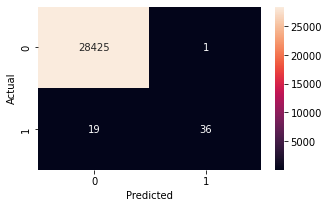

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (5,3))
sns.heatmap(cm, fmt='g', annot=True)

## KNN

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
y_pred = neigh.predict(X_test)
print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28426
           1       0.90      0.67      0.77        55

    accuracy                           1.00     28481
   macro avg       0.95      0.84      0.89     28481
weighted avg       1.00      1.00      1.00     28481



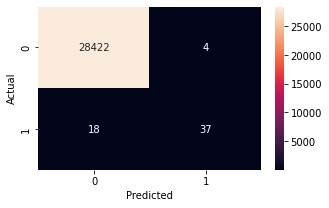

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (5,3))
sns.heatmap(cm, fmt='g', annot=True)

## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=500, random_state=20)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28426
           1       0.98      0.76      0.86        55

    accuracy                           1.00     28481
   macro avg       0.99      0.88      0.93     28481
weighted avg       1.00      1.00      1.00     28481



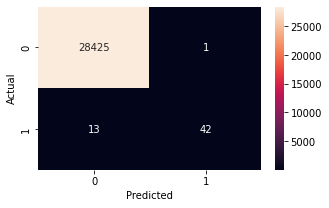

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (5,3))
sns.heatmap(cm, fmt='g', annot=True)

## Isolation Forest

In [ ]:
iso = IsolationForest(n_estimators=1000, random_state=20)
iso.fit(X_train)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=1000,
                n_jobs=None, random_state=20, verbose=0, warm_start=False)

In [ ]:
y_pred = iso.predict(X_test)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     28426
           1       0.04      0.78      0.08        55

    accuracy                           0.97     28481
   macro avg       0.52      0.87      0.53     28481
weighted avg       1.00      0.97      0.98     28481



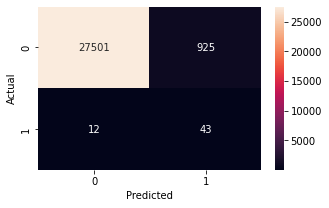

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (5,3))
sns.heatmap(cm, fmt='g', annot=True)

## LOF

In [ ]:
lof = LocalOutlierFactor(n_neighbors=20)
lof.fit(X_train)

LocalOutlierFactor(algorithm='auto', contamination='auto', leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=20, novelty=False, p=2)

In [ ]:
y_pred = iso.predict(X_test)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     28426
           1       0.04      0.78      0.08        55

    accuracy                           0.97     28481
   macro avg       0.52      0.87      0.53     28481
weighted avg       1.00      0.97      0.98     28481



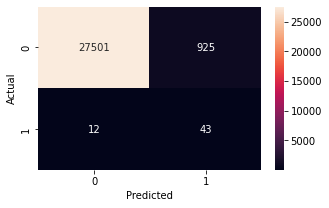

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (5,3))
sns.heatmap(cm, fmt='g', annot=True)

# Modeling (Over Sampling)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(df.iloc[:,:-1], df.iloc[:, -1])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
df = df.sample(frac=0.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


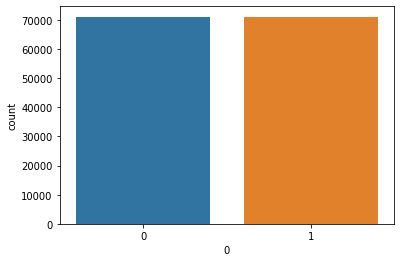

In [ ]:
sns.countplot(df.iloc[:,-1])

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state=20)

## SVC

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svc.predict(X_test)
print('Accuracy', accuracy_score(y_test, y_pred))

Accuracy 0.9740785030951041


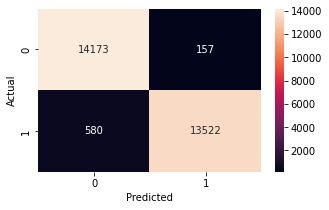

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (5,3))
sns.heatmap(cm, fmt='g', annot=True)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.9995427687113112

In [ ]:
y_pred = neigh.predict(X_test)
print('Accuracy', accuracy_score(y_test, y_pred))

Accuracy 0.9995427687113112


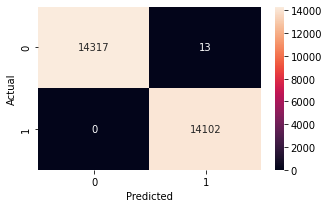

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (5,3))
sns.heatmap(cm, fmt='g', annot=True)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9999296567248172

In [ ]:
y_pred = rf.predict(X_test)
print('Accuracy', accuracy_score(y_test, y_pred))

Accuracy 0.9999296567248172


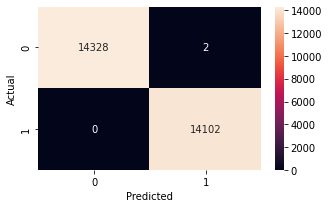

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (5,3))
sns.heatmap(cm, fmt='g', annot=True)

## Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(n_estimators=1000, bootstrap=True)
iso.fit(X_test)

IsolationForest(behaviour='deprecated', bootstrap=True, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=1000,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = iso.predict(X_test)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
print('Accuracy', accuracy_score(y_test, y_pred))

Accuracy 0.6340391108610017


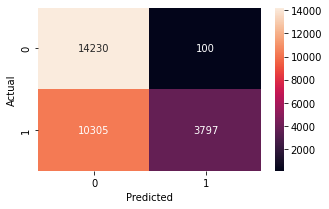

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (5,3))
sns.heatmap(cm, fmt='g', annot=True)

## LOF

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=100)
y_pred = lof.fit_predict(X_test)

In [ ]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
print('Accuracy', accuracy_score(y_test, y_pred))  

Accuracy 0.510481148002251


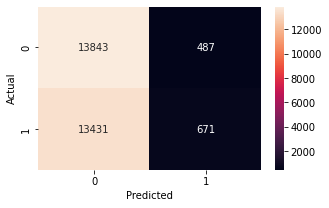

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (5,3))
sns.heatmap(cm, fmt='g', annot=True)

# Modeling (Under Sampling)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(df.iloc[:,:-1], df.iloc[:, -1])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
df = df.sample(frac=0.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


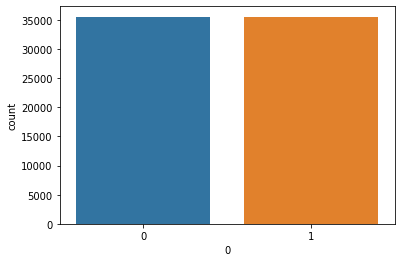

In [ ]:
sns.countplot(df.iloc[:,-1])

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state=20)

## SVC

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svc.predict(X_test)
print('Accuracy', accuracy_score(y_test, y_pred))

Accuracy 0.9628951629937337


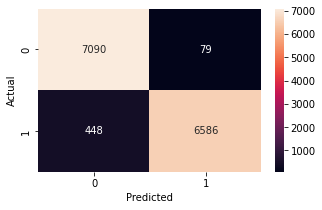

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (5,3))
sns.heatmap(cm, fmt='g', annot=True)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.9988734774343448

In [ ]:
y_pred = neigh.predict(X_test)
print('Accuracy', accuracy_score(y_test, y_pred))

Accuracy 0.9988734774343448


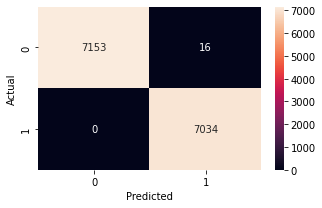

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (5,3))
sns.heatmap(cm, fmt='g', annot=True)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9998591846792931

In [ ]:
y_pred = rf.predict(X_test)
print('Accuracy', accuracy_score(y_test, y_pred))

Accuracy 0.9998591846792931


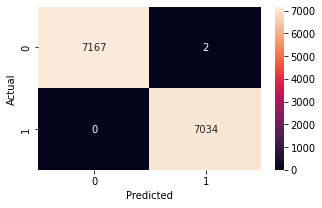

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (5,3))
sns.heatmap(cm, fmt='g', annot=True)

## Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(n_estimators=3000, bootstrap=True)
iso.fit(X_test)

IsolationForest(behaviour='deprecated', bootstrap=True, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=3000,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = iso.predict(X_test)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
print('Accuracy', accuracy_score(y_test, y_pred))

Accuracy 0.6400760402731818


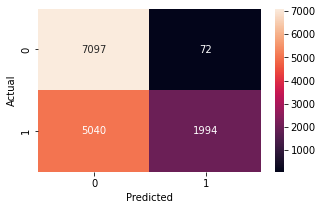

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (5,3))
sns.heatmap(cm, fmt='g', annot=True)

## LOF

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=8000)
y_pred = lof.fit_predict(X_test)

In [ ]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
print('Accuracy', accuracy_score(y_test, y_pred))

Accuracy 0.7333661902414983


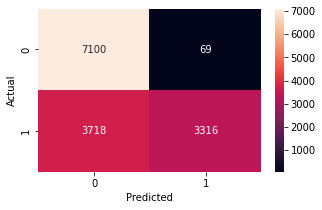

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (5,3))
sns.heatmap(cm, fmt='g', annot=True)

## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
print('Random Forest Average Score ', np.mean(cross_val_score(RandomForestClassifier(n_estimators=5, random_state=20), X_train, y_train, cv=20)))

Random Forest Average Score  0.9998415740837141


# Conclusion

Random Forest + Under sampling is giving us good accuracy.

But it can also be a case of over-fitting.

To validate this hypothesis, we applied cross validation and confirmed, there is no over-fitting.